Participant ID = /blue/stevenweisberg/share/catscenes/data/rawData/batch_2/46689_analogCatScenes_2022-03-16_22h01.18.798.csv
The Image List used is: Image_List_2


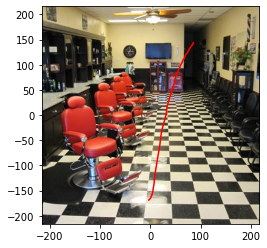

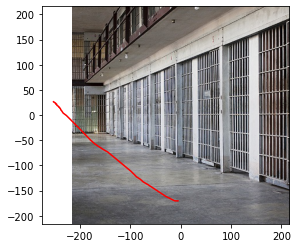

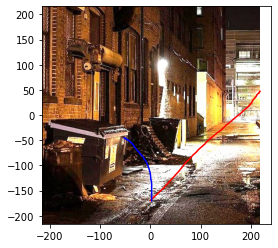

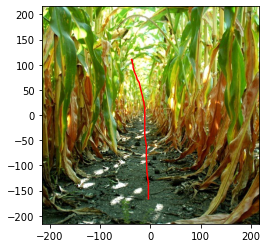

ValueError: 'poolhall2.jpeg' is not in list

In [32]:
# Imports
import numpy as np
import pandas as pd
import os
import scipy.io
from scipy import stats
import seaborn as sns
from ast import literal_eval
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm


# Set paths
baseDir = "/blue/stevenweisberg/share/catscenes/"
codeDir = os.path.join(baseDir, 'code')
dataDir = os.path.join(baseDir, 'data')
stimDir = os.path.join(baseDir, 'BOLD5000_Stimuli_Shared')

# Import helper functions
os.chdir(codeDir)

# -*- coding: utf-8 -*-
"""
Testing plotting images
"""

import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np
import pandas as pd
import os
from ast import literal_eval



# Enter the Participant ID
participant_id = 46689


# ENTER THE NAME OF THE IMAGE TO CHECK HERE:
sanityCheckImages = [['HorseRaceTrack.jpg','bambooforest4.jpg','treehouse.jpg','churchInside1.jpg','exerciseequipment3.jpg','liquorstore7.jpg','readingroom1.jpg','metroInside2.jpg'], # Image List 1
                     ['barbershop3.jpg','jail1.jpg','alley2.jpg','cornfield4.jpg','poolhall2.jpeg','dock3.jpg','horsebarn11.jpg','hardwarestore1.jpg','racecarcourse2.jpg'], # Image List 2
                     ['farmersmarket4.jpg','ruralroad3.jpg','promenadeDeck2.jpg','bambooforest3.jpg','appleorchard4.jpg','churchInside4.jpg','aquarium1.jpg','laundromat4.jpg','brewery4.jpg'], # Image List 3
                     ['bar.jpg','foodcourt6.jpg','checkoutcounter2.jpg','diner11.jpg','copyroom2.jpg','churchInside3.jpg','courtroom2.jpg','airplanecabin5.jpg','cemetery3.jpg'], # Image List 4
                     ['lockerroom.jpg','bar8.jpg','alley3.jpg','arcade2.jpg','dormroom6.jpg','botanicalGarden7.jpg','alley4.jpg','beach1.jpeg','airportTerminal6.jpg']] # Image List 5


# Get the current directory (directory the script is in)
# WE WANT THIS TO BE THE DIRECTORY THAT CONTAINS ALL 1000 IMAGES. 
# Try the  pwd command in the console. 
# ..// means up a directory. 
imDir = '/blue/stevenweisberg/share/catscenes/BOLD5000_Stimuli_Shared/Image_List_All'

# WHERE IS THE DATA
dataDir = '/blue/stevenweisberg/share/catscenes/data/rawData/batch_2'
dataFiles = os.listdir(dataDir)


# All CSVs.
dataFileNames = [x for x in dataFiles if 'csv' in x]
dataFileNames = [x for x in dataFileNames if 'analog' in x]
dataFullFileNames = []
for i in dataFileNames:
    dataFullFileNames.append(dataDir + os.path.sep + i)

participantFileName = [x for x in dataFullFileNames if str(participant_id) in x][0]



###########################
# Load in a list of images#
###########################

# Get a list of files in the stimuli directory
imFiles = os.listdir(imDir)
# List all of the jpg files
imFileNames = [x for x in imFiles if 'jpg' in x]
imFullFileNames = []
for i in imFileNames:
    imFullFileNames.append(imDir + os.path.sep + i)

#####################################
# Load in the participant data file #
#####################################

with open (participantFileName, "r") as myfile:
       participantData = pd.read_csv(myfile,sep=',')

participantData['drawingFixed'] = np.nan
participantData['drawingFixed'] = participantData['drawingFixed'].astype('object')
imageList = participantData.iloc[(3,0)]

print('Participant ID = ' + participantFileName)

sanityCheckImageList = sanityCheckImages[int(imageList[-1])-1]

print('The Image List used is: ' + imageList)


for index,row in participantData.iterrows():
    if pd.isna(row[imageList]): # If there's no image, do nothing.
        continue
    else:
         participantData.at[index,'drawingFixed'] = literal_eval(row['drawing'])


# Calculations to fix the proportions for plotting
res = participantData.loc[9,'windowSize']
res = res.strip('[]').split(',')
height = int(res[1])




def plotSanity(sketch):

    px = []
    py = []
    for i,j in enumerate(sketch):
        px.append([])
        py.append([])
        for k,l in enumerate(j):
            px[i].append(l[0]*height)
            py[i].append(l[1]*height)

    fig,ax = plt.subplots()
    plt.imshow(np.flipud(plt.imread(imFullFileNames[sampleImageIndexImageFile])), origin='lower', extent=[-height*.25,height*.25,-height*.25,height*.25])

    colors = cycle(['red','blue','green','purple','pink'])

    for i,j in enumerate(px):
        ax.plot(px[i],py[i],color=next(colors))
    
    plt.show()


for image in sanityCheckImageList:
    sampleImageIndex = participantData.index[participantData[imageList] == image].tolist()[0]

    sampleImageIndexImageFile = imFileNames.index(image)

    sketch = participantData.loc[sampleImageIndex,'drawingFixed']

    plotSanity(sketch)
